In [1]:
from match import FuzzyMatcher

matcher = FuzzyMatcher(top_k=5)

In [2]:
query = "drw11 westernwearwomen womens round neck embroidered top black"
results = matcher.match(query)

for name, score in results:
    print(f"✔️ Match: {name} — Score: {score:.3f}")

✔️ Match: drw11 westernwearwomen womens round neck embroidered top black — Score: 0.999


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import normalize
from features import extract_features

def visualize_score_distribution(query, matcher):
    user_query = normalize(query)
    scores = []

    for product in matcher.products:
        features = extract_features({"query": user_query, "product": product})
        features_df = pd.DataFrame([features])
        prob = matcher.model.predict_proba(features_df)[0][1]
        scores.append(prob)

    plt.figure(figsize=(10, 4))
    plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=0.005, color='red', linestyle='--', label='Default Threshold')
    plt.title(f"🔍 Match Score Distribution for Query:\n“{query}”")
    plt.xlabel("Match Probability")
    plt.ylabel("Number of Products")
    plt.legend()
    plt.grid(True)
    plt.show()


/Users/Agriya/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


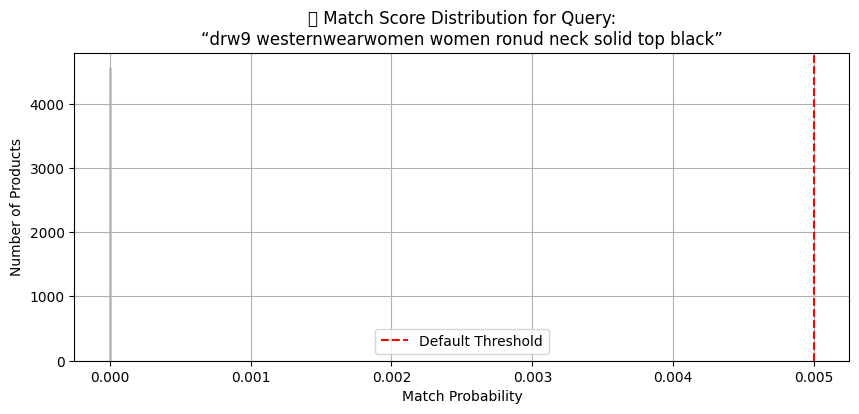

In [4]:
visualize_score_distribution("drw9 westernwearwomen women ronud neck solid top black", matcher)